# Graphing exposure data

## Relative imports

In [5]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

## Relative number of strains

In the following graph, we attempt to map out the number of strains detected over time.

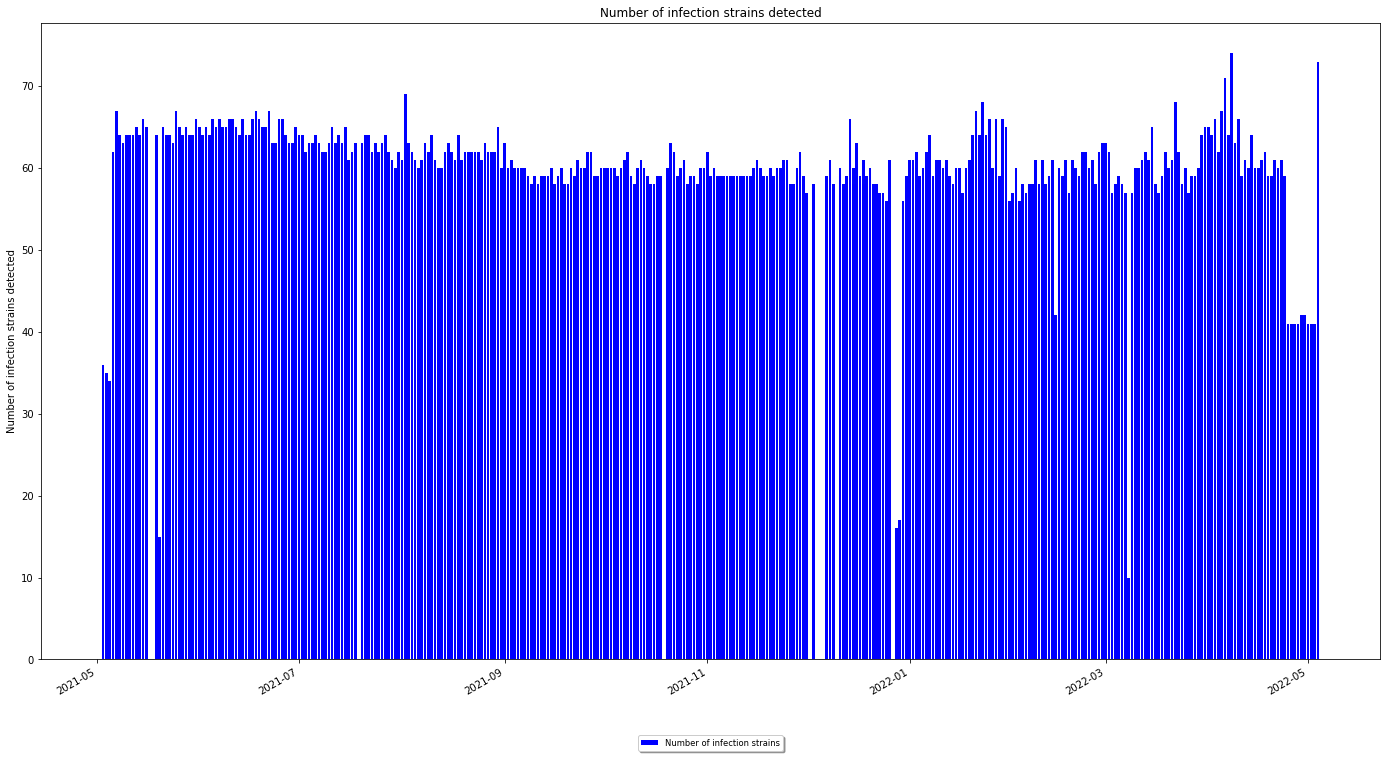

In [2]:

df = pd.read_csv('./infected_by_strain.csv')

dates = list(df.date.unique())

colors = ['#0000ff']


data = []
for d in dates:
  df_value = df[df.date == d]
  if df_value.empty:
    data += [0]
  else:
    data += [df_value.iloc[0]['strain_count']]

plt.rcParams["figure.figsize"] = (24,13)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

ax.bar(dates, data, width=width, label='Number of infection strains', color=colors[0])

ax.set_ylabel('Number of infection strains detected')
ax.set_title('Number of infection strains detected')
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='lower center', fontsize='small', ncol=12, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

plt.savefig('../images/infections-count-strains.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2)
plt.show()

## Identifying majority share

We use the tables to identify which infection strain was the most relevant in our entire dataset: `android.hummer`

In [3]:
df = pd.read_csv('infected_by_infection.csv')
grouped = df.groupby(["infection"]).sum().sort_values(['count'], ascending=False)

top1 = grouped.head(1)

total = 0
for i, r in grouped.iterrows():
    if i != "android.hummer":
        total += r["count"]
    
top1.loc['other'] = total
top1

/home/atomic/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,count
infection,
android.hummer,146611968
other,118663430


## Collect the names of each infection strain.

In [7]:
df = pd.read_csv('infected_by_infection.csv')

infection_names = list(set(df.infection.unique()) - set(["?"]))

infection_types = dict()
for n in infection_names:
    if True in map(n.startswith, ["CVE", "EDB", "avalanche", "android."]):
        for k in ["CVE", "EDB", "avalanche", "android"]:
            if n.startswith(k):
                if f"{k}-*" not in infection_types.keys(): infection_types[f"{k}-*"] = dict(list=[], count=0)
                infection_types[f"{k}-*"]["count"] += 1
                infection_types[f"{k}-*"]["list"] += [n]
    else:
        infection_types[f"{n}"] = dict(list=[], count=0)
        infection_types[f"{n}"]["count"] += 1
        infection_types[f"{n}"]["list"] += [n]

infection_names, infection_types

(['CVE-2016-6277',
  'CVE-2014-2321',
  'teleru',
  'android.banker.anubis',
  'android.fobus',
  'CVE-2021-28151',
  'OPENVAS-1361412562310107187',
  'coinminer',
  'qsnatch',
  'android.gopl',
  'android.digitime.fota',
  'android.bakdoor.prizmes',
  'avalanche-dofoil',
  'CVE-2020-8958',
  'android.fakebank',
  'CVE-2020-5722',
  'android.fakedoc',
  'android.smssilence',
  'android.rootnik',
  'CVE-2015-2051',
  'android.uupay',
  'android.fungram',
  'android.hummer',
  'android.skyfin',
  'android.smsspy',
  'CVE-2018-14839',
  'CVE-2020-8515',
  'EDB-39596',
  'CVE-2017-17215',
  'flubot',
  'mkero',
  'unityminer',
  'CVE-2020-35713',
  'android.fakeav',
  'vpnfilter',
  'dresscode',
  'android.sssaaa',
  'kasidet',
  'android.smsspy.be24',
  'CVE-2022-25075',
  'avalanche-marcher',
  'CVE-2016-5674',
  'CVE-2019-19824',
  'android.hqwar',
  'CVE-2014-3206',
  'ssh-brute-force',
  'android.milipnot',
  'CVE-2017-18368',
  'CVE-2021-45382',
  'xcodeghost',
  'linux.backdoor.seta

##

In [5]:
colors = ['#00E5CB', '#03E1C8', '#06DDC5', '#09DAC2', '#0CD6BF', '#0FD2BC', '#12CFB9', '#15CBB6', '#18C7B3', '#1BC4B1', '#1EC0AE', '#21BDAB', '#24B9A8', '#27B5A5', '#2AB2A2', '#2DAE9F', '#30AA9C', '#33A799', '#36A397', '#399F94', '#3C9C91', '#3F988E', '#42958B', '#459188', '#488D85', '#4B8A82', '#4E867F', '#51827D', '#547F7A', '#577B77', '#5A7774', '#5D7471', '#61706E', '#646D6B', '#676968', '#6A6565', '#6D6263', '#705E60', '#735A5D', '#76575A', '#795357', '#7C4F54', '#7F4C51', '#82484E', '#85454B', '#884149', '#8B3D46', '#8E3A43', '#913640', '#94323D', '#972F3A', '#9A2B37', '#9D2734', '#A02431', '#A3202F', '#A61D2C', '#A91929', '#AC1526', '#AF1223', '#B20E20', '#B50A1D', '#B8071A', '#BB0317', '#BF0015', '#00E50E', '#02E110', '#05DD13', '#08DA16', '#0BD619', '#0ED21C', '#11CF1E', '#14CB21', '#17C724', '#1AC427', '#1DC02A', '#20BD2C', '#23B92F', '#26B532', '#29B235', '#2CAE38', '#2FAA3A', '#32A73D', '#35A340', '#389F43', '#3B9C46', '#3E9849', '#41954B', '#44914E', '#478D51', '#4A8A54', '#4D8657', '#508259', '#537F5C', '#567B5F', '#597762', '#5C7465', '#5E7067', '#616D6A', '#64696D', '#676570', '#6A6273', '#6D5E75', '#705A78', '#73577B', '#76537E', '#794F81', '#7C4C84', '#7F4886', '#824589', '#85418C', '#883D8F', '#8B3A92', '#8E3694', '#913297', '#942F9A', '#972B9D', '#9A27A0', '#9D24A2', '#A020A5', '#A31DA8', '#A619AB', '#A915AE', '#AC12B0', '#AF0EB3', '#B20AB6', '#B507B9', '#B803BC', '#BB00BF']

/tmp/ipykernel_370977/2729294837.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.infection==i]


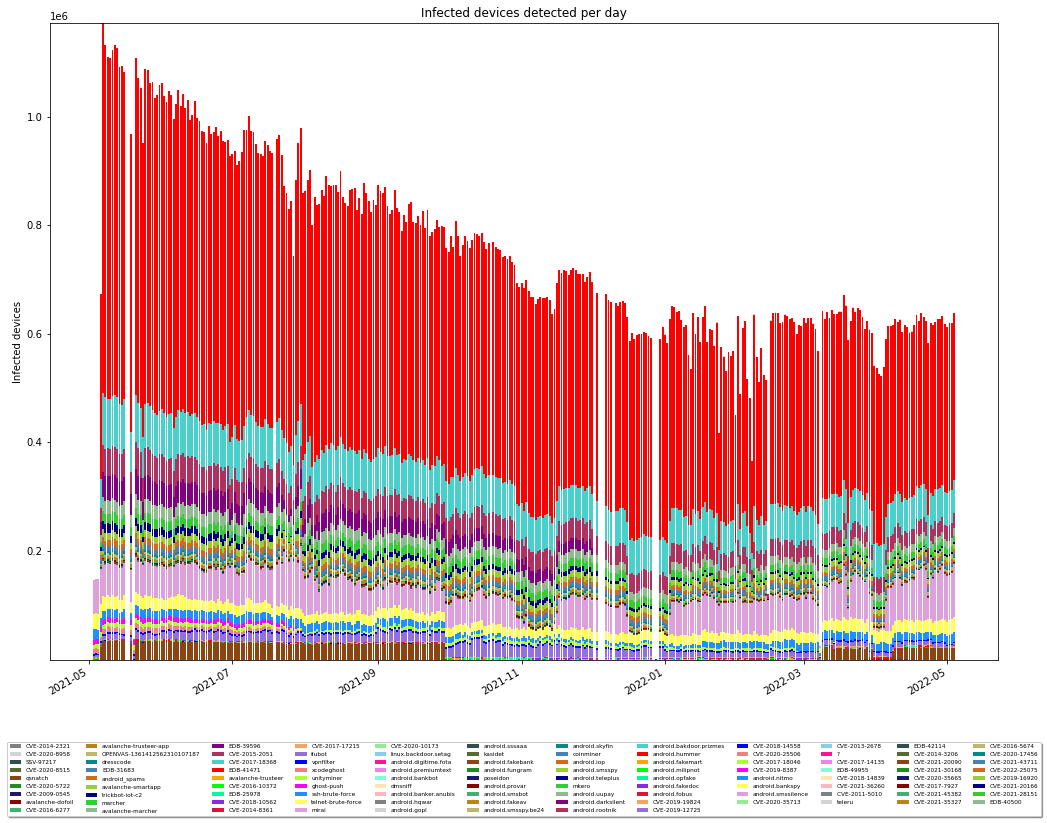

In [6]:

df = pd.read_csv('infected_by_infection.csv')

dates = list(df.date.unique())
infection = list(df.infection.unique())

colors = ['#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', 
'#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f',
'#8b4513',
 '#228b22', '#191970', 
'#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', 
'#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2']

data = {}
done = 0
for i in infection:
  data[i] = []
  for d in dates:
    df_value = df[df.date == d][df.infection==i]
    if df_value.empty:
      data[i] += [0]
    else:
      data[i] += [df_value.iloc[0]['count']]

  done += 1
  print(f'{str(done).zfill(len(str(len(infection))))}/{len(infection)}: {infection}')

plt.rcParams["figure.figsize"] = (17,13)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom = data[infection[0]]
ax.bar(dates, bottom, width=width, label=infection[0], color=colors[0])
for i in range(1, len(infection)):
  ax.bar(dates, data[infection[i]], width=width, label=infection[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[infection[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Infected devices')
ax.set_title('Infected devices detected per day')
ax.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', fontsize='xx-small', ncol=12, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/infections.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2)
plt.show()